You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
    
dataset link : https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0

3. Use both one vs all and one vs one method for the above problem statement purpose.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split # to split data into training sets and test sets
import pandas as pd
import pandas as pd
import statistics
from random import seed
from sklearn.model_selection import train_test_split # to split data into training sets and test sets
from scipy import stats
from itertools import combinations

In [4]:
!apt install unzip
!unzip SMAI_Log_reg_dataset.zip
!unzip SMAI_Log_reg_dataset/X.npy.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Archive:  SMAI_Log_reg_dataset.zip
 extracting: SMAI_Log_reg_dataset/titanic.csv  
 extracting: SMAI_Log_reg_dataset/X.npy.zip  
 extracting: SMAI_Log_reg_dataset/Y.npy  
Archive:  SMAI_Log_reg_dataset/X.npy.zip
  inflating: X.npy                   


PRE-PROCESSING OF DATA

In [39]:
x_l = np.load("X.npy") # image
y_l = np.load("SMAI_Log_reg_dataset/Y.npy") # label

x_train, x_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.3, random_state=32)

#print(x_train[:10])
# print(y_train[:10])
# print(x_test[:10])
# print(y_test[:10])

x_l=np.reshape(x_l,(x_l.shape[0], -1))


# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

#print(x_l.shape)

In [6]:
#hypothesis that takes the input variables and theta. It returns the calculated output variable.
def hypothesis(theta, X):
  return 1 / (1 + np.exp(-(np.dot(X,theta)))) - 0.0000001

def gradient_descent(x, y, theta, alpha, epoch):
    for i in range(epoch):
        for j in range(0, 10):
            theta1=theta[:,j].reshape(-1,1)
            h = hypothesis(theta1, x)
            for k in range(0, theta.shape[0]):
                temp_y= y[:,j].reshape(-1,1)
                temp_x=x[:, k].reshape(-1,1)
                theta[k][j] -= (alpha/len(x)) * np.sum((h-temp_y)*temp_x)
    return theta


temp=[]
for i in range(0,10):
  temp.append(i)
combo=list(combinations(temp,2)) 

In [40]:
#print(x_test.shape)
#print(x_train.shape)

x_train=np.reshape(x_train,(x_train.shape[0], -1))
ones=np.ones(shape=x_train.shape[0]).reshape(-1,1)
x_train=np.concatenate((ones,x_train),1)

x_test=np.reshape(x_test,(x_test.shape[0], -1))
ones=np.ones(shape=x_test.shape[0]).reshape(-1,1)
x_test=np.concatenate((ones,x_test),1)


#print(x_test.shape)
#print(x_train.shape)


ONE VS ALL METHOD : 

In [9]:


theta = np.zeros([x_train.shape[1], y_train.shape[1]])
#print(len(theta),len(theta[0]))
theta = gradient_descent(x_train, y_train, theta, 0.01, 1000)


# With this updated theta, calculate the output variable.
#print(len(theta),len(theta[0]))
#print(x_test.shape)
#print("***************")
output = []
for i in range(0, 10):
    #theta1 = pd.DataFrame(theta)
    #h = hypothesis(theta1.iloc[:,i], x_test)
    theta1=theta[:,i].reshape(-1,1)
    h = hypothesis(theta1, x_test)

    output.append(h)


output=np.array(output)

accuracy = 0
for col in range(0, 10):
    for row in range(len(y_test)):
        temp=output[:,row].reshape(-1,1)
        if y_test[row][col] == 1 and output[col][row] == max(temp):
            accuracy += 1

accuracy = accuracy/len(x_test)
print(accuracy*100)

70.75928917609046


In [69]:
output1=[]
for i in range(len(output)):
  ll=[]
  for j in range(len(output[0])):
    ll.append(output[i][j][0])
  output1.append(ll)

output1=np.array(output1).transpose()
onevsall_y=[]
for i in output1:
  onevsall_y.append(np.argmax(i))
onevsall_y=np.array(onevsall_y)
#print(onevsall_y.shape)

ONE VS ONE :

In [41]:
theta=[]
for pair in combo:
    a=pair[0]
    b=pair[1]
    
    temp_x=[]
    temp_y=[]

    for i in range(len(y_train)):
      if np.argmax(y_train[i])==a or np.argmax(y_train[i])==b :
        temp_x.append(x_train[i])
        temp_y.append(y_train[i][a])

    w=np.zeros(4097)
    diff=[]
    epoch=1000
    alpha=0.1
    for i in range(epoch):
      y_predict=1 / (1 + np.exp(-(np.dot(temp_x,w)))) - 0.0000001
      cost=np.subtract(y_predict,temp_y)
      diff.append(cost)
      t=[]
      t=np.dot(np.array(temp_x).T,cost)
      t1=t*(alpha/len(temp_y))
      w=w-t1
    
    theta.append(w)

y_pred=[]

for i in x_test :
  l=[]
  for j in range(len(theta)):
    hypo=hypothesis(i, theta[j])
    if hypo>=0.5:
      l.append(combo[j][0])
    else:
      l.append(combo[j][1])

  aa=stats.mode(l)
  y_pred.append(aa)

#print(y_pred)

accuracy=0
for i in range(len(y_test)):
  if np.argmax(y_test[i])==y_pred[i][0][0]:
    accuracy+=1

accuracy = accuracy/len(x_test)
print(accuracy*100)


72.21324717285945


In [56]:
y_pred_one_one=[]
for i in y_pred:
  y_pred_one_one.append(i[0])


2.
a) Plot a diagram for the sigmoid function. This is used for binary classication.
b) How do you modify it for multilabel dataset classification problems? State and Explain the methods used.



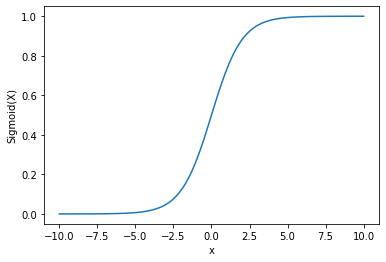

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

Ans. 2b) If the inputs of your classification task have multiple labels for an input, your classes are not mutually exclusive and you can use Sigmoid for each output. Logistic regression uses a sigmoid function to predict the output. The sigmoid function returns a value from 0 to 1. Generally, we take a threshold such as 0.5. If the sigmoid function returns a value greater than or equal to 0.5, we take it as 1, and if the sigmoid function returns a value less than 0.5, we take it as 0.

h= 1 / (1 + e^(-z)) - 0.0000001

where z =  input features multiplied by theta(t)

X = [X1, X2, X3] are input features

Hence, h= t0 + t1*X1 + t2*X2 + ....

(q3 done along with q1)

4. Also get results using Log Reg from scikit learn.


In [54]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics


y_train1=[]
for yy in y_train:
  y_train1.append(np.argmax(yy))
y_train1=np.array(y_train1)

y_test1=[]
for yy in y_test:
  y_test1.append(np.argmax(yy))
y_test1=np.array(y_test1)

# print(x_train.shape)
# print(y_train1.shape)
# print(x_test.shape)
# print(y_test1.shape)

lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train, y_train1)
y_sklearn=lm.predict(x_test)
print("SCORE FROM Log Reg from scikit learn")
lm.score(x_test, y_test1)


SCORE FROM Log Reg from scikit learn


0.7140549273021002

5. Report metrics you feel useful and Compare the results - from all the three.

A] ACCURACY SCORE :
<br>
one vs all : 0.7075928917609046
<br>
one vs one : 0.7221324717285945
<br>
scikit learn : 0.7172859450726979
<br><br>

From the above score, we can see that one vs one gave the maximum accuracy out of all 3 methods.


B] CONFUSION MATRIX :

In [65]:
from sklearn.metrics import confusion_matrix
print("y_test vs onevsall : ")
confusion_matrix(y_test1, onevsall_y)

y_test vs onevsall : 


array([[50,  2,  2,  0,  0,  0,  2,  0,  1,  3],
       [ 1, 47,  1,  5,  0,  1,  3,  0,  0,  0],
       [ 0,  4, 30,  3,  3,  0,  2,  0,  5,  0],
       [ 0,  0,  2, 52,  1,  0,  4,  0,  4,  0],
       [ 0,  1,  2,  0, 41,  5,  1,  1,  1,  0],
       [ 4,  2,  3,  1,  2, 51,  1,  0,  1,  1],
       [ 1,  1,  8, 12,  0,  5, 26,  0,  5,  2],
       [ 5,  0,  2,  0,  4,  0,  0, 49,  3,  8],
       [ 1,  2, 14,  3, 10,  0,  0,  0, 42,  0],
       [ 9,  0,  1,  0,  0,  2,  3,  5,  0, 50]])

In [66]:
print("y_test vs onevsone : ")
confusion_matrix(y_test1, y_pred_one_one)


y_test vs onevsone : 


array([[52,  1,  2,  0,  0,  0,  1,  0,  1,  3],
       [ 2, 49,  0,  5,  0,  0,  2,  0,  0,  0],
       [ 0,  4, 22,  3,  7,  2,  1,  1,  7,  0],
       [ 0,  0,  0, 45,  1,  3,  0,  1, 13,  0],
       [ 0,  2,  0,  0, 45,  3,  0,  1,  1,  0],
       [ 2,  1,  0,  1,  2, 57,  0,  0,  1,  2],
       [ 4,  3,  3, 24,  0, 11,  9,  0,  5,  1],
       [ 3,  0,  1,  2,  0,  0,  0, 57,  1,  7],
       [ 1,  1,  3,  3,  8,  1,  0,  2, 52,  1],
       [ 4,  0,  0,  0,  0,  3,  2,  2,  0, 59]])

In [67]:
print("onevsall vs sklearn : ")
confusion_matrix(onevsall_y,y_sklearn)


onevsall vs sklearn : 


array([[56,  1,  0,  2,  1,  1,  0,  4,  0,  6],
       [ 2, 50,  1,  0,  0,  2,  3,  0,  1,  0],
       [ 0,  0, 40,  7,  5,  2,  7,  1,  2,  1],
       [ 0,  2,  0, 46,  0,  2, 12,  0, 14,  0],
       [ 0,  0,  3,  4, 47,  2,  0,  3,  2,  0],
       [ 1,  3,  0,  1,  2, 53,  0,  0,  1,  3],
       [ 0,  2,  3,  2,  0,  2, 32,  0,  0,  1],
       [ 1,  0,  0,  2,  1,  0,  1, 43,  0,  7],
       [ 0,  1,  1,  5,  4,  0,  4,  2, 45,  0],
       [ 0,  2,  0,  2,  0,  1,  2,  5,  0, 52]])

In [68]:
print("onevsone vs sklearn : ")
confusion_matrix(y_pred_one_one,y_sklearn)


onevsone vs sklearn : 


array([[53,  3,  1,  3,  1,  1,  2,  3,  0,  1],
       [ 1, 50,  3,  1,  0,  2,  4,  0,  0,  0],
       [ 0,  0, 27,  0,  2,  1,  1,  0,  0,  0],
       [ 0,  2,  2, 47,  1,  1, 23,  0,  7,  0],
       [ 0,  0,  6,  5, 47,  2,  3,  0,  0,  0],
       [ 2,  2,  2,  1,  3, 55, 12,  0,  1,  2],
       [ 0,  2,  2,  0,  0,  0, 10,  0,  0,  1],
       [ 2,  0,  1,  3,  2,  1,  0, 51,  2,  2],
       [ 0,  1,  4, 11,  4,  0,  4,  2, 55,  0],
       [ 2,  1,  0,  0,  0,  2,  2,  2,  0, 64]])